In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import WordCloud

In [12]:
file_loc= r"C:\Users\suhai\Downloads\Task_03\twitter_training.csv"
df= pd.read_csv(file_loc)
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [13]:
#Manually adding column headers
df.columns= ['tweet_id','Entity', 'sentiment', 'tweet_text']
df.head()

,tweet_id,Entity,sentiment,tweet_text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [14]:
#performing data cleaning
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.head()

,tweet_id,Entity,sentiment,tweet_text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [15]:
#checking total count of each sentiment
print(df['sentiment'].value_counts())

sentiment
Negative      21698
Positive      19712
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64


C:\Users\suhai\AppData\Local\Temp\ipykernel_11688\835356507.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='viridis')


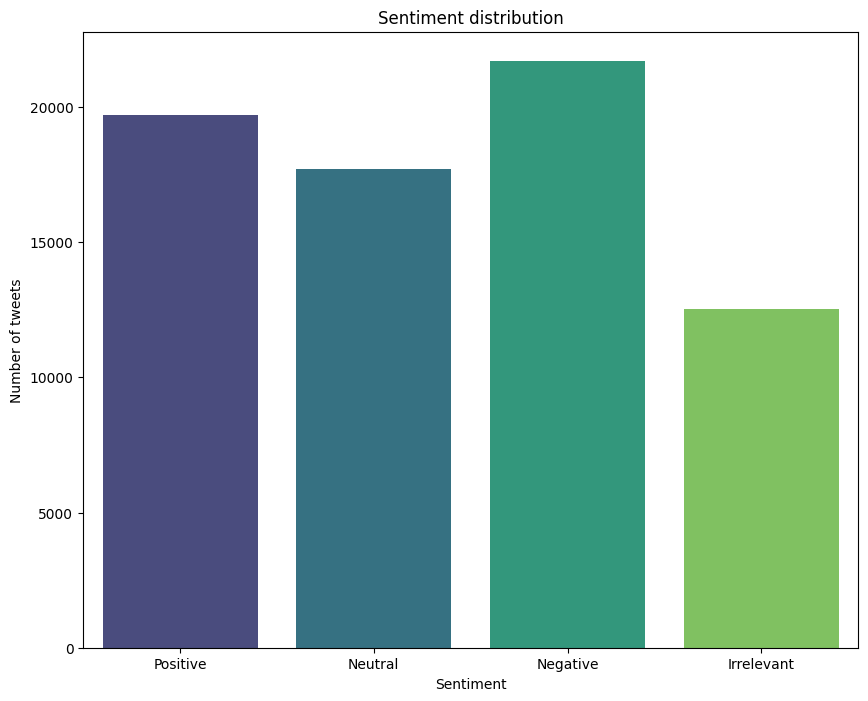

In [16]:
# visualising sentiment count
plt.figure(figsize=(10,8))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Sentiment distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of tweets')
plt.show()

In [17]:
#sentiment count for Microsoft
brand_data= df[df['Entity'].str.contains('Microsoft', case=False)]
brand_sentiment_counts=brand_data['sentiment'].value_counts()
brand_sentiment_counts

sentiment
Neutral       816
Negative      748
Positive      573
Irrelevant    167
Name: count, dtype: int64

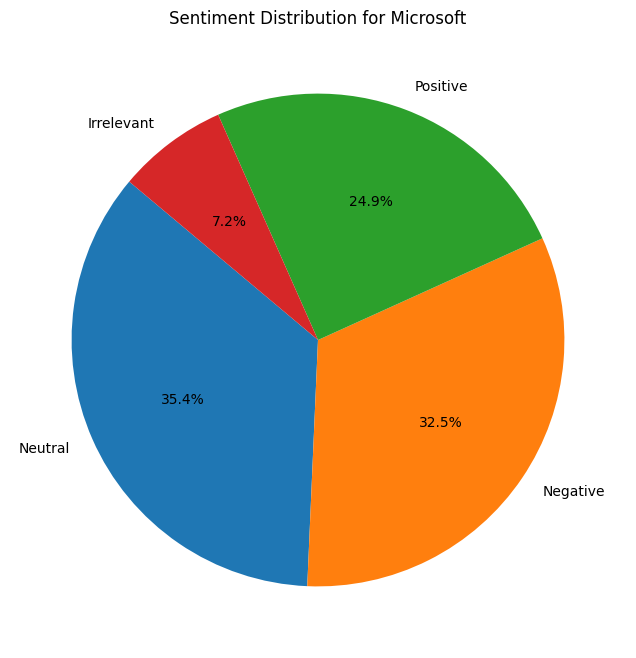

In [20]:
#Visualising sentiment distribution for Microsoft
plt.figure(figsize=(10,8))
plt.pie(brand_sentiment_counts, labels=brand_sentiment_counts.index, autopct='%1.1f%%',startangle=140)
plt.title('Sentiment Distribution for Microsoft')
plt.show()


In [21]:
#sentiment count for Google
brand_data= df[df['Entity'].str.contains('Google', case=False)]
brand_sentiment_counts=brand_data['sentiment'].value_counts()
brand_sentiment_counts

sentiment
Neutral       785
Negative      570
Irrelevant    505
Positive      339
Name: count, dtype: int64

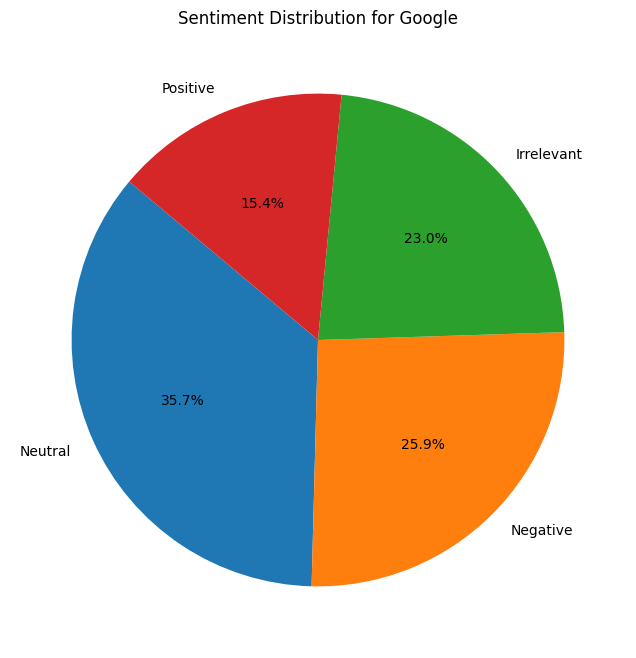

In [22]:
#Visualising sentiment distribution for Google
plt.figure(figsize=(10,8))
plt.pie(brand_sentiment_counts, labels=brand_sentiment_counts.index, autopct='%1.1f%%',startangle=140)
plt.title('Sentiment Distribution for Google')
plt.show()

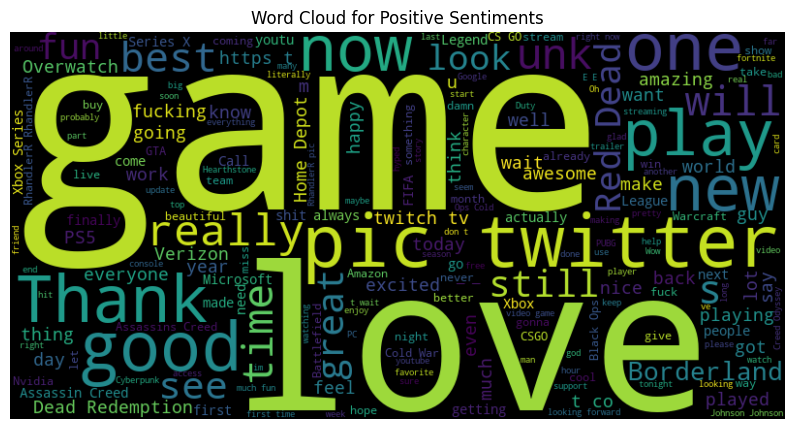

In [23]:
# Visualising positive sentiments using word cloud
positive_tweets = df[df['sentiment'] == 'Positive']['tweet_text'].values
positive_text ="".join(tweet for tweet in positive_tweets)
#print(f"Positive Text:{positive_text}")
if positive_text.strip():
    wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='black').generate(positive_text)

    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Positive Sentiments')
    plt.show()
else:
    print("No positive tweets to display in word cloud.")


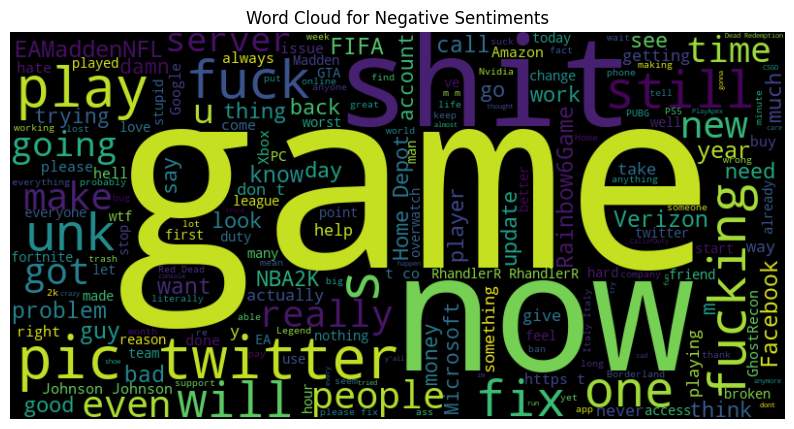

In [24]:
# Visualising negative sentiments using word cloud
negative_tweets = df[df['sentiment'] == 'Negative']['tweet_text'].values
negative_text ="".join(tweet for tweet in negative_tweets)
#print(f"Negative Text:{negative_text}")
if negative_text.strip():
    wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='black').generate(negative_text)

    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Negative Sentiments')
    plt.show()
else:
    print("No negative tweets to display in word cloud.")